In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from visualization import per_architecture_backward_visualize, per_architecture_time_visualize, time_visualize

# Recorded Data

In [3]:
# 100 epochs each
data = np.array([
    # ['1032 Params (No Sync)','1',20.493320716515882,8.886360266042175,30.129091926006367],
    # ['1032 Params (No Sync)','2',10.101747540320503,4.332710637827404,14.820007350994274],
    # ['1032 Params (No Sync)','3',7.084352586098248,2.987977896700613,10.340268292988185],
    # ['1032 Params (No Sync)','4',5.513166963180993,2.33337817832944,8.05299507098971],
    # ['91302 Params (No Sync)','1',21.418931563122896,12.74918604301638,34.91040612701909],
    # ['91302 Params (No Sync)','2',11.988793305325089,6.073976311017759,18.830450704001123],
    # ['91302 Params (No Sync)','3',7.626138022809755,4.040917023608927,11.955998360994272],
    # ['91302 Params (No Sync)','4',6.260444950865349,3.392984755919315,9.876888113009045],
    ['GCN, 1032 Params','1',20.105493029899662,9.257247774803545,30.099264652992133],
    ['GCN, 1032 Params','2',10.007511413947213,6.211184888903517,16.606522115005646],
    ['GCN, 1032 Params','3',7.988323143188609,6.058900479372824,14.362335459998576],
    ['GCN, 1032 Params','4',7.3486666590033565,6.585823955741944,14.217244132014457],
    ['GCN, 91302 Params','1',22.0089265833667,13.459854033222655,36.240488319977885],
    ['GCN, 91302 Params','2',11.796605543408077,9.540089427377097,21.843346803012537],
    ['GCN, 91302 Params','3',9.239567982498556,8.968158911098726,18.607978877989808],
    ['GCN, 91302 Params','4',8.01007054100046, 9.122747796762269, 17.480196406017058],
    ['GCN, 91302 Params (Optimized)','1',21.764182391721988,14.760542787320446,37.29480585700367],
    ['GCN, 91302 Params (Optimized)','2',11.291009680659045,8.753637378948042,20.49537957800203],
    ['GCN, 91302 Params (Optimized)','3',9.103775252820924,8.507102872536052,17.995450880989665],
    ['GCN, 91302 Params (Optimized)','4',7.85412518211524,8.421780110162217,16.611743643996306],
    # ['GraphSage','1',0,0,63],
    # ['GraphSage','2',0,0,45],
    # ['GraphSage','3',0,0,38],
    # ['GraphSage','4',0,0,36],
]).squeeze()

# Visualizations

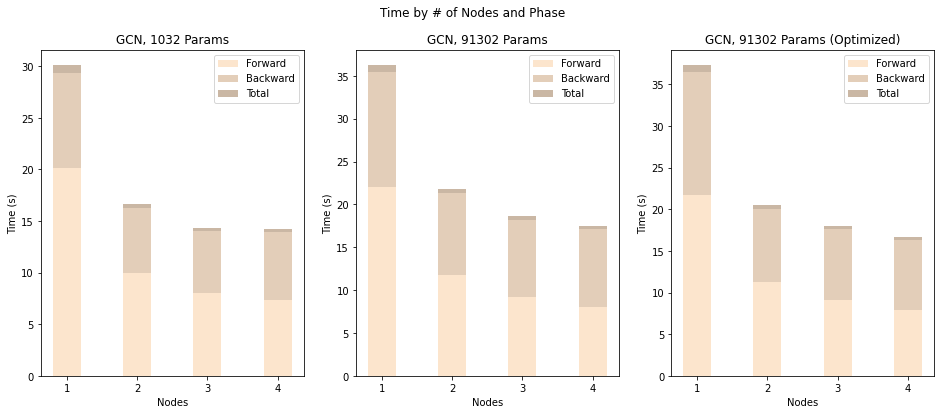

In [4]:
unique_architectures = np.unique(np.array([d[0] for d in data]))
fig, ax = plt.subplots(figsize=(16,6))
fig.suptitle('Time by # of Nodes and Phase')
for i, arch in enumerate(unique_architectures):
    ax = plt.subplot(1, len(unique_architectures), i+1)
    temp = [d[1:] for d in data if d[0] == arch]
    time_visualize(*temp, arch=arch, ax=ax)

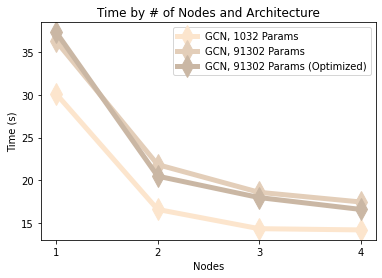

In [5]:
temp = [d[[0,1,4]] for d in data]
per_architecture_time_visualize(*temp)

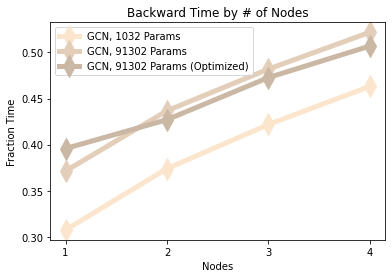

In [6]:
per_architecture_backward_visualize(*data)